# House Price Prediction (Advanced Regression)

-----------------------------------------------
> Author : Shiva Kumar Bandaru   
> E-mail : shivamkr.b271999@gmail.com  

------------------------------------------------------------------

In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})


In [5]:
df2 = missing_value_df.drop(missing_value_df[(missing_value_df['percent_missing'] == 0)].index)

In [6]:
# Identifying the column which has >40% of null values

df2[df2['percent_missing'] >= 40]

,percent_missing
Alley,93.767123
FireplaceQu,47.260274
PoolQC,99.520548
Fence,80.753425
MiscFeature,96.301370


In [7]:
df2.index[df2['percent_missing'] >= 40]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
# Dropping the columns 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' the have >40% of null values
# Dropping 'Id' columns which is not useful


df = df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'])

In [9]:
# Identifying the column which has >40% of null values

df2[df2['percent_missing'] < 40 ]

,percent_missing
LotFrontage,17.739726
MasVnrType,0.547945
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
GarageType,5.547945


In [10]:
# Imputing columns
# 'LotFrontage'  - with median value
# 'MasVnrArea'   - with 0
# 'GarageYrBlt   - with mean value

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].fillna(0), inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)

In [11]:
missing_cat = [var for var in df.columns if df[var].isnull().mean() > 0 and df[var].dtypes == 'O']
missing_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [12]:
df['MasVnrType'].fillna('None', inplace = True)

In [13]:
#pd.set_option('display.max_rows', None)

df.isnull().sum() * 100 

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [14]:
# For Categorical columns filling the values with None as most of them are specified as None in dataset

for i in missing_cat:
    df[i].fillna("None", inplace=True)

In [15]:
#pd.set_option('display.max_rows', None)

df.isnull().sum() * 100 

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

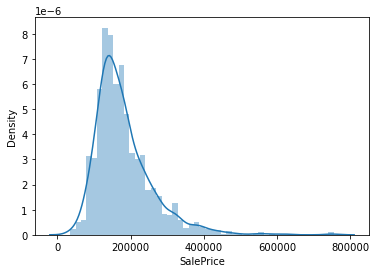

In [17]:
# Distribution of Target Variable

sns.distplot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

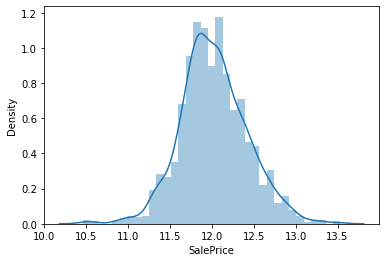

In [18]:
# Performing Log transformation for Target variable as data is left-skewed

df['SalePrice']=np.log1p(df['SalePrice'])

sns.distplot(df['SalePrice'])

In [19]:
# correlation matrix
corr = df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.335292
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426776
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


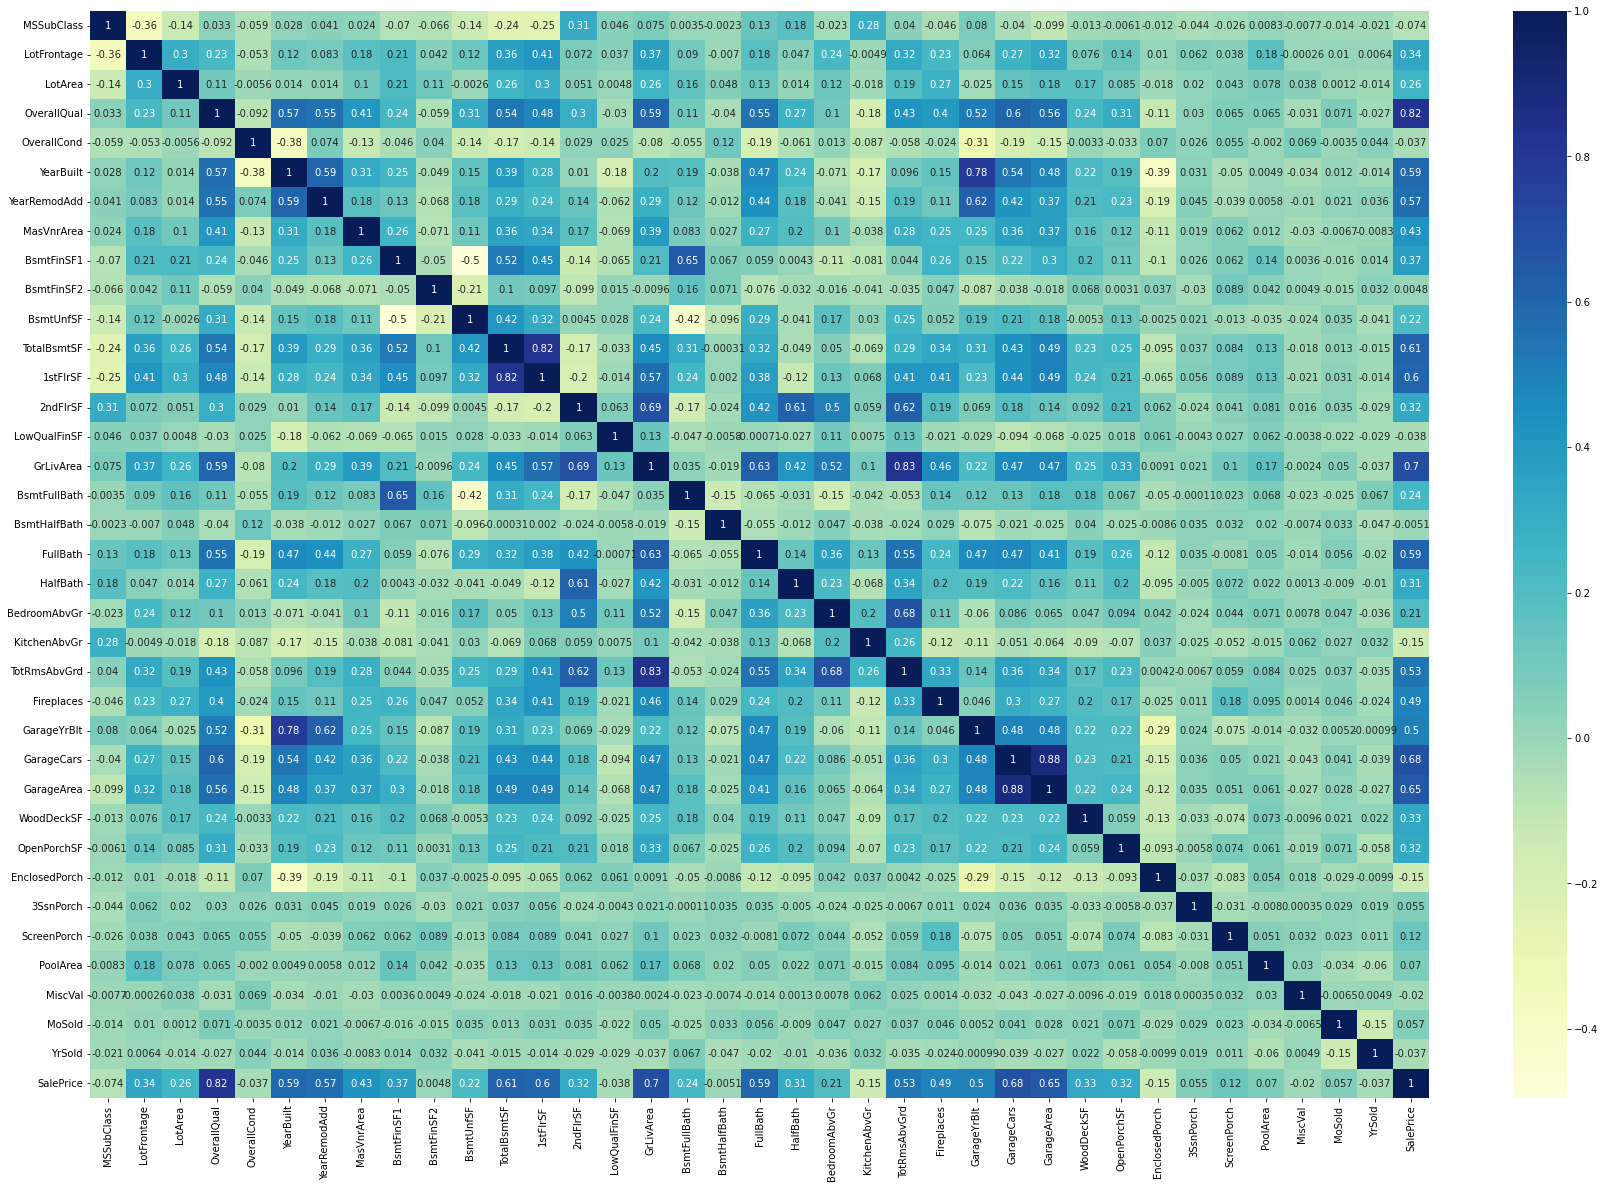

In [20]:
# plotting heatmap

# figure size
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [21]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
cat_vars

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [22]:
num_vars = [var for var in df.columns if df[var].dtypes == 'int64' or df[var].dtypes == float]
num_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [23]:
# Creating Dummies for Categorical columns to make them numerical

df = pd.get_dummies(df, drop_first=True )
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 243 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(33), uint8(206)
memory usage: 715.9 KB


### Splitting data into Train and Test 

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
scaler = StandardScaler()
# Apply scaler() to all the numerical columns 


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.524903,-1.694350,-0.558025,0.043512,-0.293313,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.717033,0.390956,0.809137,1.160345,-0.293313,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-0.865510,-1.694350,-0.558025,-0.761296,-0.293313,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,-2.019448,0.875911,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-2.843689,-1.694350,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0


In [27]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [28]:
y_train

210    -1.335436
318     1.125546
239    -0.976220
986    -0.888481
1416   -0.772617
          ...   
1009   -1.234534
802     0.321115
53      2.115682
350     1.633933
79     -1.044086
Name: SalePrice, Length: 1021, dtype: float64

In [29]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.524903,-1.694350,-0.558025,0.043512,-0.293313,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.717033,0.390956,0.809137,1.160345,-0.293313,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-0.865510,-1.694350,-0.558025,-0.761296,-0.293313,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,-2.019448,0.875911,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-2.843689,-1.694350,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-0.195040,-0.432493,-0.435334,-0.779861,-0.533005,-1.491933,-1.694350,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
802,0.035976,-0.296554,-0.221924,0.649651,-0.533005,1.112669,0.972902,-0.558025,0.430853,-0.293313,...,0,0,0,0,1,0,0,0,1,0
53,-0.888086,-0.069989,3.861098,2.079162,-0.533005,0.321398,0.099983,-0.558025,2.931352,-0.293313,...,0,0,0,0,1,0,0,0,1,0
350,1.422070,-0.069989,-0.258706,2.079162,-0.533005,1.178608,1.069893,1.375227,-0.963574,-0.293313,...,0,0,1,0,0,0,0,0,0,1


In [30]:

df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('SalePrice')
X_test = df_test

In [31]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.008299,-0.675945,-0.558025,0.361992,-0.293313,...,0,0,0,0,1,0,0,0,1,0
57,0.035976,0.881585,0.112505,0.649651,-0.533005,1.079700,0.924407,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.782973,0.536443,-0.355087,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.145639,1.021398,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,0.189519,-0.384972,-0.558025,0.159714,-0.293313,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,-0.888086,0.473768,-0.085959,-0.779861,0.383154,-0.403935,-1.257891,0.146918,1.168952,-0.293313,...,0,0,0,0,1,0,0,0,1,0
555,-0.310547,-0.523119,-0.398455,-0.779861,0.383154,-1.623812,-1.694350,-0.558025,-0.963574,-0.293313,...,0,0,0,0,1,0,0,0,1,0
399,0.035976,-0.205928,-0.229106,0.649651,-0.533005,1.145639,1.069893,-0.023977,0.783763,-0.293313,...,0,0,0,0,1,0,0,0,1,0
545,-0.195040,-0.024676,0.325235,0.649651,-0.533005,0.552185,0.148479,0.392580,1.192623,0.889608,...,0,0,0,0,1,0,0,0,1,0


In [32]:
y_test

1436   -0.814136
57      0.419269
780     0.141373
382     0.628551
1170    0.068681
          ...   
509    -0.731770
555    -0.976220
399     0.934146
545     0.805323
266     0.267162
Name: SalePrice, Length: 438, dtype: float64

## Linear Regression

In [33]:
# Importing Libraries for LinearRegression & RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [34]:
# Performing RFE 
# there are >240 variables for analysis

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [35]:
# Ranks of columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 60),
 ('LotFrontage', False, 66),
 ('LotArea', False, 13),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 20),
 ('MasVnrArea', False, 136),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 34),
 ('BsmtHalfBath', False, 141),
 ('FullBath', False, 127),
 ('HalfBath', False, 129),
 ('BedroomAbvGr', False, 89),
 ('KitchenAbvGr', False, 21),
 ('TotRmsAbvGrd', False, 99),
 ('Fireplaces', False, 40),
 ('GarageYrBlt', False, 140),
 ('GarageCars', False, 38),
 ('GarageArea', False, 17),
 ('WoodDeckSF', False, 70),
 ('OpenPorchSF', False, 98),
 ('EnclosedPorch', False, 100),
 ('3SsnPorch', False, 101),
 ('ScreenPorch', False, 84),
 ('PoolArea', False, 134),
 ('MiscVal', False, 137),
 ('MoSold', False, 138),
 ('YrSold', False, 113),
 ('MSZo

In [36]:
# Top 100 fetures

feat_100 = X_train.columns[rfe.support_]
feat_100

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
   

In [37]:
# X_test

X_train_rfe = X_train[feat_100]
X_train_rfe = pd.DataFrame(X_train[feat_100])
X_train_rfe.head()

,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Partial
210,-0.779861,0.383154,-1.524903,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,1,0,0,0,0,0,0,1,0,0
318,0.649651,-0.533005,0.717033,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,0,0,1,0,0,0,0,1,0,0
239,-0.065105,-1.449164,-0.865510,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,0,0,1,0,0,0,0,1,0,0
986,-0.065105,2.215472,-2.019448,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,0,0,1,0,0,0,0,1,0,0
1416,-1.494617,0.383154,-2.843689,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,0,0,1,0,0,0,0,1,0,0


In [38]:
X_train_rfe.shape

(1021, 100)

In [39]:
from sklearn import metrics

# prediction on Test data 

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.958024306615968

In [40]:
# R2 Score for LR Model

y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-5.004306885894133e+17

In [41]:
# Seperating the features
# Top 100 features

feat2_100 = X_test.columns[rfe.support_]
feat2_100

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_OldTown', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
   

In [42]:
X_test_rfe = X_test[feat2_100]
X_test_rfe.head()

,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCond_None,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Partial
1436,-1.494617,0.383154,-0.008299,0.361992,-0.293313,-0.704396,-0.430911,-0.765065,-0.787597,-0.124502,...,0,0,1,0,0,0,0,1,0,0
57,0.649651,-0.533005,1.079700,-0.963574,-0.293313,0.660317,-0.439628,-0.775120,1.189021,-0.124502,...,0,0,1,0,0,0,0,1,0,0
780,0.649651,-0.533005,0.782973,-0.963574,-0.293313,1.500998,0.381881,0.212779,-0.787597,-0.124502,...,0,0,1,0,0,0,0,1,0,0
382,0.649651,-0.533005,1.145639,-0.963574,-0.293313,0.836481,-0.267481,-0.576535,1.184425,-0.124502,...,0,0,1,0,0,0,0,1,0,0
1170,-0.065105,0.383154,0.189519,0.159714,-0.293313,0.022559,0.074633,-0.126576,-0.787597,-0.124502,...,0,0,1,0,0,0,0,1,0,0


# Lasso and Ridge Regression


In [43]:
# Imprting libraries for Lasso and Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Lasso Regression

In [44]:
# Implementing Lasso

# alpha values for tuning the model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
cross_check = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

cross_check.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# cv_results
cv_results = pd.DataFrame(cross_check.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.122126,0.016025,0.006398,0.002059,0.0001,{'alpha': 0.0001},-0.219493,-0.232101,-0.235012,-0.232585,...,-0.223553,0.013612,1,-0.146659,-0.144527,-0.147661,-0.149209,-0.148586,-0.147329,0.001645
1,0.118532,0.014366,0.007195,0.002040,0.001,{'alpha': 0.001},-0.231185,-0.234182,-0.258668,-0.205571,...,-0.228913,0.018209,2,-0.190510,-0.166467,-0.182208,-0.191501,-0.192956,-0.184728,0.009867
2,0.024187,0.003309,0.006596,0.001496,0.01,{'alpha': 0.01},-0.235874,-0.261857,-0.259205,-0.224704,...,-0.243480,0.014526,3,-0.235969,-0.212992,-0.227321,-0.239009,-0.238110,-0.230680,0.009764
3,0.016191,0.002227,0.005199,0.001600,0.05,{'alpha': 0.05},-0.251104,-0.283536,-0.284846,-0.263978,...,-0.272000,0.012804,4,-0.270837,-0.239058,-0.260077,-0.273793,-0.275568,-0.263866,0.013519
4,0.017790,0.003542,0.007197,0.001938,0.1,{'alpha': 0.1},-0.279666,-0.316998,-0.311330,-0.306291,...,-0.306048,0.013726,5,-0.311734,-0.274930,-0.296471,-0.308189,-0.311407,-0.300546,0.013959


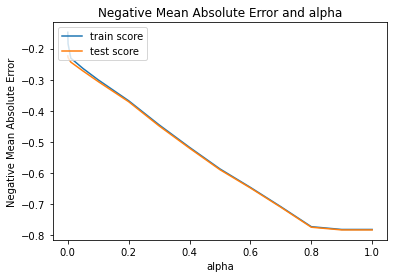

In [46]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [47]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.05024442, -0.        ,  0.03609196,  0.29320688,  0.10716915,
        0.14991517,  0.07056958,  0.00200417,  0.        ,  0.        ,
        0.        ,  0.0624114 ,  0.01461652,  0.        , -0.        ,
        0.24798654,  0.08562609,  0.00392897,  0.03662583,  0.01132494,
        0.00332844, -0.0233547 ,  0.03932839,  0.07404133,  0.        ,
        0.12308361,  0.01365912,  0.03094137, -0.        ,  0.00238666,
        0.00877338,  0.02321353, -0.05383686, -0.        , -0.        ,
       -0.01451716,  0.        ,  0.        ,  0.02237034, -0.1026775 ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.05053312, -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.  

In [48]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.081),
 ('MSSubClass', -0.05),
 ('LotFrontage', -0.0),
 ('LotArea', 0.036),
 ('OverallQual', 0.293),
 ('OverallCond', 0.107),
 ('YearBuilt', 0.15),
 ('YearRemodAdd', 0.071),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.062),
 ('1stFlrSF', 0.015),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.248),
 ('BsmtFullBath', 0.086),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.037),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.023),
 ('TotRmsAbvGrd', 0.039),
 ('Fireplaces', 0.074),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.123),
 ('GarageArea', 0.014),
 ('WoodDeckSF', 0.031),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.002),
 ('3SsnPorch', 0.009),
 ('ScreenPorch', 0.023),
 ('PoolArea', -0.054),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.015),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.022),
 ('MSZoning_RM', -0.103),
 ('Street_Pave', 0.0),
 ('LotShap

In [49]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.8762843000046499
0.867837466901328
RMSE : 0.37194250305925103


In [50]:
mod = list(zip(cols, model_parameters))

In [51]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,-0.081
1,MSSubClass,-0.050
2,LotFrontage,-0.000
3,LotArea,0.036
4,OverallQual,0.293


In [52]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
4,OverallQual,0.293
16,GrLivArea,0.248
6,YearBuilt,0.150
26,GarageCars,0.123
5,OverallCond,0.107
...,...,...
1,MSSubClass,-0.050
61,Neighborhood_Edwards,-0.051
33,PoolArea,-0.054
0,constant,-0.081


In [53]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
4,OverallQual,0.293
16,GrLivArea,0.248
6,YearBuilt,0.150
26,GarageCars,0.123
5,OverallCond,0.107
17,BsmtFullBath,0.086
80,Condition1_Norm,0.085
24,Fireplaces,0.074
7,YearRemodAdd,0.071
12,TotalBsmtSF,0.062


In [54]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(39, 2)

In [55]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars', 'OverallCond', 'BsmtFullBath', 'Condition1_Norm', 'Fireplaces', 'YearRemodAdd', 'TotalBsmtSF', 'GarageType_Attchd', 'TotRmsAbvGrd', 'FullBath', 'LotArea', 'Foundation_PConc', 'WoodDeckSF', 'ScreenPorch', 'MSZoning_RL', 'BsmtFinType1_GLQ', '1stFlrSF', 'GarageArea', 'HalfBath', '3SsnPorch', 'BsmtExposure_Gd', 'BsmtHalfBath', 'BedroomAbvGr', 'EnclosedPorch', 'MasVnrArea', 'BsmtExposure_No', 'YrSold', 'GarageFinish_Unf', 'KitchenAbvGr', 'HeatingQC_TA', 'BsmtFinType1_Unf', 'MSSubClass', 'Neighborhood_Edwards', 'PoolArea', 'constant', 'MSZoning_RM']


In [56]:
X_train_lasso = X_train[['GarageType_Attchd', 'Foundation_PConc', 'YearRemodAdd', 'BsmtFinType1_GLQ', 'MSZoning_RL', 'LotShape_Reg', 'GarageFinish_Unf', 'BsmtQual_TA', 'MasVnrType_None', 'KitchenQual_TA', 'ExterQual_TA']]
                        
X_train_lasso.head()

,GarageType_Attchd,Foundation_PConc,YearRemodAdd,BsmtFinType1_GLQ,MSZoning_RL,LotShape_Reg,GarageFinish_Unf,BsmtQual_TA,MasVnrType_None,KitchenQual_TA,ExterQual_TA
210,0,0,-1.694350,0,1,1,0,1,1,1,1
318,1,1,0.390956,1,1,1,0,0,0,0,0
239,0,0,-1.694350,0,1,1,1,1,1,1,1
986,1,0,0.875911,0,0,1,1,1,1,0,1
1416,0,1,-1.694350,0,0,1,1,1,1,1,1


In [57]:
X_train_lasso.shape

(1021, 11)

In [58]:
X_test_lasso = X_test[['GarageType_Attchd', 'Foundation_PConc', 'YearRemodAdd', 'BsmtFinType1_GLQ', 'MSZoning_RL', 'LotShape_Reg', 'GarageFinish_Unf', 'BsmtQual_TA', 'MasVnrType_None', 'KitchenQual_TA', 'ExterQual_TA']]
                        
X_test_lasso.head()

,GarageType_Attchd,Foundation_PConc,YearRemodAdd,BsmtFinType1_GLQ,MSZoning_RL,LotShape_Reg,GarageFinish_Unf,BsmtQual_TA,MasVnrType_None,KitchenQual_TA,ExterQual_TA
1436,0,1,-0.675945,0,1,1,1,1,1,1,1
57,1,1,0.924407,0,1,0,0,0,1,0,0
780,1,1,0.536443,0,1,1,0,0,0,1,1
382,1,1,1.021398,0,1,0,0,0,1,0,0
1170,1,0,-0.384972,0,1,1,0,1,1,1,1


## Ridge Regression

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
cross_check = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
cross_check.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
cv_results = pd.DataFrame(cross_check.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014188,0.002314,0.005197,0.002039,0.0001,{'alpha': 0.0001},-0.225112,-0.237175,-0.237849,-0.251166,...,-0.232073,0.014156,9,-0.139777,-0.141374,-0.141201,-0.143395,-0.141461,-0.141442,0.001153
1,0.012594,0.002498,0.005195,0.001938,0.001,{'alpha': 0.001},-0.225065,-0.237116,-0.237928,-0.249982,...,-0.231805,0.013889,6,-0.139907,-0.141388,-0.141364,-0.143502,-0.141599,-0.141552,0.001146
2,0.014793,0.002133,0.005995,0.001672,0.01,{'alpha': 0.01},-0.225638,-0.236571,-0.240138,-0.240981,...,-0.230494,0.011995,2,-0.142441,-0.141532,-0.143563,-0.145315,-0.143853,-0.143341,0.001288
3,0.016792,0.002315,0.005596,0.001018,0.05,{'alpha': 0.05},-0.236425,-0.234894,-0.249842,-0.225435,...,-0.233295,0.010276,12,-0.152444,-0.142363,-0.152310,-0.154776,-0.154461,-0.151271,0.004567
4,0.012594,0.003004,0.004795,0.001470,0.1,{'alpha': 0.1},-0.242235,-0.233953,-0.255212,-0.221273,...,-0.236134,0.011773,17,-0.158909,-0.143385,-0.158066,-0.161997,-0.161847,-0.156841,0.006906


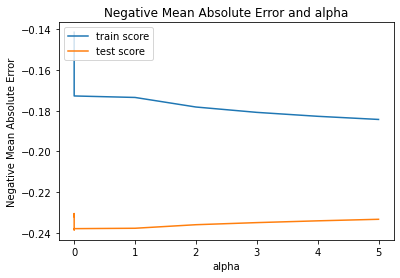

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.39428537e-02, -2.46433555e-02,  4.59478656e-02,  1.84946286e-01,
        8.99536948e-02,  8.36749925e-02,  5.64511710e-02, -6.08347822e-03,
       -8.94232590e-03,  1.77885839e-02,  1.23529304e-02,  9.63519936e-03,
        9.90232780e-02,  1.15862113e-01,  5.48782357e-03,  1.69376900e-01,
        6.89130939e-02,  7.54261337e-03,  4.28426421e-02,  2.34682337e-02,
        3.11885205e-02, -3.46958741e-02,  3.02898834e-02,  3.86184164e-02,
       -2.49303653e-02,  1.08307649e-01,  1.08069703e-02,  3.08468678e-02,
        2.45741880e-04,  2.44021888e-02,  2.06200026e-02,  2.66571892e-02,
       -3.42769903e-02, -2.29781719e-03, -4.47488286e-03, -1.50375732e-02,
        3.50074572e-01,  3.63631742e-01,  4.08424045e-01,  3.29471649e-01,
        1.36424648e-01,  5.69196211e-02, -1.77083237e-01,  1.42154492e-02,
        1.35169051e-01,  1.57327171e-01,  1.51141379e-01, -1.20487394e-01,
        9.05318714e-02, -1.34288130e-01, -9.45403377e-02, -3.04875231e-02,
        6.49828551e-02, -

In [63]:
# Ridge Regression model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -1.561),
 ('MSSubClass', -0.054),
 ('LotFrontage', -0.025),
 ('LotArea', 0.046),
 ('OverallQual', 0.185),
 ('OverallCond', 0.09),
 ('YearBuilt', 0.084),
 ('YearRemodAdd', 0.056),
 ('MasVnrArea', -0.006),
 ('BsmtFinSF1', -0.009),
 ('BsmtFinSF2', 0.018),
 ('BsmtUnfSF', 0.012),
 ('TotalBsmtSF', 0.01),
 ('1stFlrSF', 0.099),
 ('2ndFlrSF', 0.116),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.169),
 ('BsmtFullBath', 0.069),
 ('BsmtHalfBath', 0.008),
 ('FullBath', 0.043),
 ('HalfBath', 0.023),
 ('BedroomAbvGr', 0.031),
 ('KitchenAbvGr', -0.035),
 ('TotRmsAbvGrd', 0.03),
 ('Fireplaces', 0.039),
 ('GarageYrBlt', -0.025),
 ('GarageCars', 0.108),
 ('GarageArea', 0.011),
 ('WoodDeckSF', 0.031),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.024),
 ('3SsnPorch', 0.021),
 ('ScreenPorch', 0.027),
 ('PoolArea', -0.034),
 ('MiscVal', -0.002),
 ('MoSold', -0.004),
 ('YrSold', -0.015),
 ('MSZoning_FV', 0.35),
 ('MSZoning_RH', 0.364),
 ('MSZoning_RL', 0.408),
 ('MSZoning_RM', 0.329),
 ('Street_Pav

In [64]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# prediction
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.9307475290237582
0.8889966110785108
RMSE : 0.3408707619544575


## CONCLUSION:

### "Lasso Regression" performing better and is the best fit when compared to Ridge and Linear Regression 
